In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
pd.set_option('display.max_columns', 50)

ModuleNotFoundError: No module named 'pandas'

In [21]:
dados = pd.read_csv('C:\\Users\\reisg\OneDrive\\Área de Trabalho\\Treinamento\\Já Fiz\\Exerc_4\\2016-building-energy-benchmarking.csv')
dados.head() 

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [22]:
dados.shape

(3376, 46)

In [23]:
dados.drop(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'YearsENERGYSTARCertified'], axis=1, inplace=True)

In [24]:
(dados.isnull().sum() / 3376)*100

OSEBuildingID                       0.000000
NumberofBuildings                   0.236967
NumberofFloors                      0.000000
PropertyGFATotal                    0.000000
PropertyGFAParking                  0.000000
PropertyGFABuilding(s)              0.000000
LargestPropertyUseTypeGFA           0.592417
SecondLargestPropertyUseTypeGFA    50.266588
ThirdLargestPropertyUseTypeGFA     82.345972
ENERGYSTARScore                    24.970379
SiteEUI(kBtu/sf)                    0.207346
SiteEUIWN(kBtu/sf)                  0.177725
SourceEUI(kBtu/sf)                  0.266588
SourceEUIWN(kBtu/sf)                0.266588
SiteEnergyUse(kBtu)                 0.148104
SiteEnergyUseWN(kBtu)               0.177725
SteamUse(kBtu)                      0.266588
Electricity(kWh)                    0.266588
Electricity(kBtu)                   0.266588
NaturalGas(therms)                  0.266588
NaturalGas(kBtu)                    0.266588
TotalGHGEmissions                   0.266588
GHGEmissio

In [25]:
dados.head() 

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,1.0,12,88434,0,88434,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,1.0,41,956110,196718,759392,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,1.0,10,61320,0,61320,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [26]:
dados['SecondLargestPropertyUseTypeGFA'].fillna(dados['SecondLargestPropertyUseTypeGFA'].mean(), inplace=True) 
dados['ThirdLargestPropertyUseTypeGFA'].fillna(dados['ThirdLargestPropertyUseTypeGFA'].mean(), inplace=True) 
dados['ENERGYSTARScore'].fillna(dados['ENERGYSTARScore'].mean(), inplace=True) 
dados['NumberofBuildings'].fillna(dados['NumberofBuildings'].mean(), inplace=True) 
dados['LargestPropertyUseTypeGFA'].fillna(dados['LargestPropertyUseTypeGFA'].mean(), inplace=True) 
dados['SiteEUI(kBtu/sf)'].fillna(dados['SiteEUI(kBtu/sf)'].mean(), inplace=True) 
dados['SiteEUIWN(kBtu/sf)'].fillna(dados['SiteEUIWN(kBtu/sf)'].mean(), inplace=True) 
dados['SourceEUI(kBtu/sf)'].fillna(dados['SourceEUI(kBtu/sf)'].mean(), inplace=True) 
dados['GHGEmissionsIntensity'].fillna(dados['GHGEmissionsIntensity'].mean(), inplace=True) 
dados['TotalGHGEmissions'].fillna(dados['TotalGHGEmissions'].mean(), inplace=True) 
dados['SiteEUI(kBtu/sf)'].fillna(dados['SiteEUI(kBtu/sf)'].mean(), inplace=True) 
dados['NaturalGas(kBtu)'].fillna(dados['NaturalGas(kBtu)'].mean(), inplace=True) 
dados['NaturalGas(therms)'].fillna(dados['NaturalGas(therms)'].mean(), inplace=True) 
dados['Electricity(kBtu)'].fillna(dados['Electricity(kBtu)'].mean(), inplace=True) 
dados['Electricity(kWh)'].fillna(dados['Electricity(kWh)'].mean(), inplace=True) 
dados['SteamUse(kBtu)'].fillna(dados['SteamUse(kBtu)'].mean(), inplace=True) 
dados['SiteEnergyUseWN(kBtu)'].fillna(dados['SiteEnergyUseWN(kBtu)'].mean(), inplace=True) 
dados['SiteEnergyUse(kBtu)'].fillna(dados['SiteEnergyUse(kBtu)'].mean(), inplace=True) 
dados['SourceEUIWN(kBtu/sf)'].fillna(dados['SourceEUIWN(kBtu/sf)'].mean(), inplace=True) 
 

In [27]:
(dados.isnull().sum() / 3376)*100

OSEBuildingID                      0.0
NumberofBuildings                  0.0
NumberofFloors                     0.0
PropertyGFATotal                   0.0
PropertyGFAParking                 0.0
PropertyGFABuilding(s)             0.0
LargestPropertyUseTypeGFA          0.0
SecondLargestPropertyUseTypeGFA    0.0
ThirdLargestPropertyUseTypeGFA     0.0
ENERGYSTARScore                    0.0
SiteEUI(kBtu/sf)                   0.0
SiteEUIWN(kBtu/sf)                 0.0
SourceEUI(kBtu/sf)                 0.0
SourceEUIWN(kBtu/sf)               0.0
SiteEnergyUse(kBtu)                0.0
SiteEnergyUseWN(kBtu)              0.0
SteamUse(kBtu)                     0.0
Electricity(kWh)                   0.0
Electricity(kBtu)                  0.0
NaturalGas(therms)                 0.0
NaturalGas(kBtu)                   0.0
TotalGHGEmissions                  0.0
GHGEmissionsIntensity              0.0
dtype: float64

In [28]:
dados.head()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,1.0,12,88434,0,88434,88434.0,28444.075817,11738.675166,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,1.0,11,103566,15064,88502,83880.0,15064.000000,4622.000000,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,1.0,41,956110,196718,759392,756493.0,28444.075817,11738.675166,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,1.0,10,61320,0,61320,61320.0,28444.075817,11738.675166,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,1.0,18,175580,62000,113580,123445.0,68009.000000,0.000000,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [29]:
dados.corr(method='pearson') 

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,0.025595,-0.103456,-0.136508,-0.213901,-0.110409,-0.105849,-0.148894,-0.087287,0.065976,-0.126381,-0.125672,-0.149475,-0.148356,-0.118035,-0.203240,-0.033543,-0.129994,-0.129994,-0.085505,-0.085505,-0.100323,-0.034938
NumberofBuildings,0.025595,1.000000,-0.026384,0.693342,-0.004774,0.730422,0.758726,0.029178,0.000143,-0.001214,0.032999,0.007033,0.031599,0.003896,0.690698,0.090483,0.397587,0.735028,0.735028,0.062324,0.062324,0.405261,0.027564
NumberofFloors,-0.103456,-0.026384,1.000000,0.400488,0.420489,0.356107,0.338771,0.395056,0.147783,0.022436,0.009351,-0.000857,0.037676,0.031664,0.205852,0.293071,0.079491,0.251494,0.251494,0.065221,0.065221,0.136004,-0.042441
PropertyGFATotal,-0.136508,0.693342,0.400488,1.000000,0.402580,0.989823,0.973874,0.503537,0.232159,0.040413,0.070639,0.040078,0.083306,0.054656,0.796733,0.400787,0.440519,0.849481,0.849481,0.183388,0.183388,0.531377,0.020102
PropertyGFAParking,-0.213901,-0.004774,0.420489,0.402580,1.000000,0.268217,0.300529,0.444226,0.149836,0.044080,0.097105,0.089078,0.134545,0.128057,0.171537,0.238243,0.013500,0.220342,0.220342,0.058543,0.058543,0.088620,-0.043157
PropertyGFABuilding(s),-0.110409,0.730422,0.356107,0.989823,0.268217,1.000000,0.978193,0.460867,0.221032,0.035678,0.059245,0.028330,0.066755,0.037613,0.811821,0.384754,0.461507,0.859747,0.859747,0.183898,0.183898,0.545448,0.027865
LargestPropertyUseTypeGFA,-0.105849,0.758726,0.338771,0.973874,0.300529,0.978193,1.000000,0.416710,0.166420,0.030781,0.057111,0.026601,0.062123,0.032461,0.836110,0.393507,0.497632,0.875023,0.875023,0.198723,0.198723,0.578433,0.053539
SecondLargestPropertyUseTypeGFA,-0.148894,0.029178,0.395056,0.503537,0.444226,0.460867,0.416710,1.000000,0.475900,0.050566,0.071857,0.058681,0.083555,0.076815,0.404383,0.558708,0.221535,0.375146,0.375146,0.343731,0.343731,0.423559,0.083326
ThirdLargestPropertyUseTypeGFA,-0.087287,0.000143,0.147783,0.232159,0.149836,0.221032,0.166420,0.475900,1.000000,-0.001215,0.061300,0.060411,0.064683,0.064216,0.326518,0.460355,0.006844,0.241549,0.241549,0.514121,0.514121,0.390259,0.181603
ENERGYSTARScore,0.065976,-0.001214,0.022436,0.040413,0.044080,0.035678,0.030781,0.050566,-0.001215,1.000000,-0.256293,-0.261006,-0.244396,-0.249348,-0.060519,-0.083857,-0.036547,-0.034313,-0.034313,-0.095624,-0.095624,-0.090315,-0.190429


<Axes: >

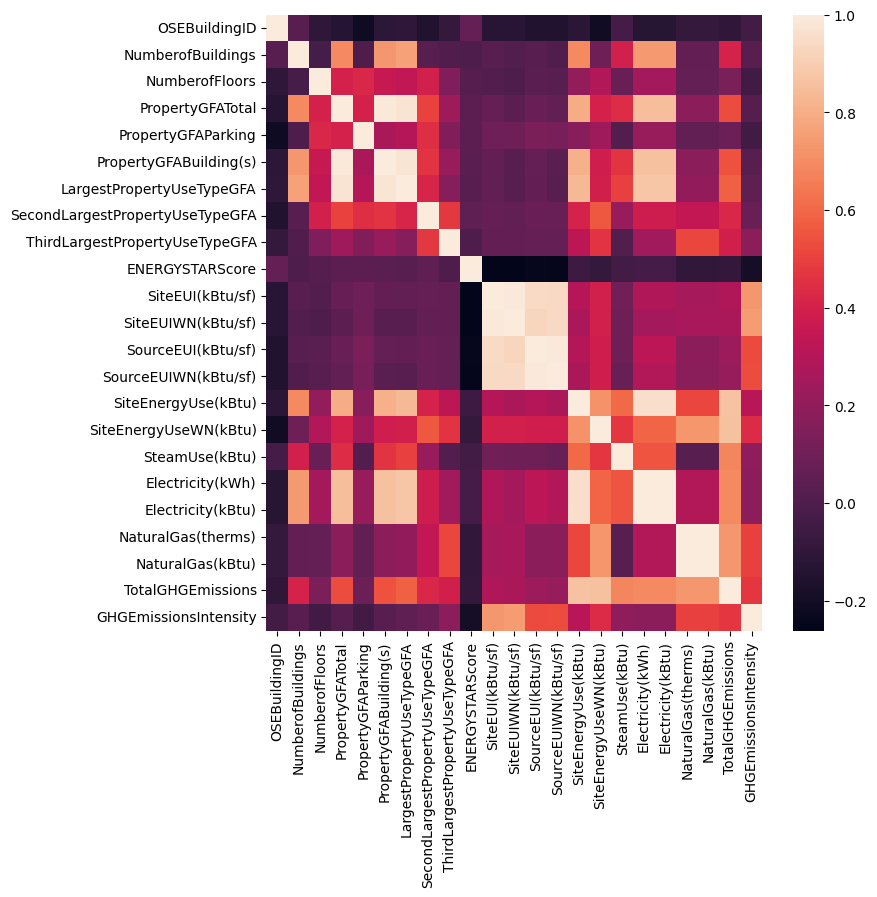

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(dados.corr())

In [31]:
y = dados['PropertyGFATotal']
x = dados.drop('PropertyGFATotal', axis=1)

In [32]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3)

In [33]:
modelo = LinearRegression()

modelo.fit(x_treino, y_treino)

LinearRegression()

In [34]:
modelo.score(x_teste, y_teste) 

1.0

In [35]:
modelo_lasso = Lasso(alpha=1)
modelo_lasso.fit(x_treino, y_treino)

Lasso(alpha=1)

In [36]:
modelo_lasso.score(x_teste, y_teste)

0.9999999153522552